In [ ]:
#  Librerias necesarias

import requests
import random
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
#  Descargar stopwords en español

nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

#  URL del artículo de Wikipedia del Titanic

url = "https://es.wikipedia.org/wiki/RMS_Titanic"

#  Obtener el contenido HTML y parsearlo

contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#  Extraer todos los párrafos del artículo

todos_parrafos = " ".join([p.text for p in soup.find_all("p")])

#  Contar algunas palabras clave

for palabra in ["Titanic", "hundimiento", "pasajeros", "supervivientes", "iceberg","jack","rose"]:
    print(f"'{palabra}' aparece {todos_parrafos.lower().count(palabra.lower())} veces")

#  Función para buscar cualquier palabra

def buscar_palabra(palabra):
    ocurrencias = todos_parrafos.lower().count(palabra.lower())
    print(f"'{palabra}' aparece {ocurrencias} veces")

#  Limpiar y dividir el texto en palabras

palabras = re.findall(r'\b\w+\b', todos_parrafos.lower())

#  Contar las palabras

contador_palabras = Counter(palabras)

#  Obtener las 20 palabras más comunes

top_20 = contador_palabras.most_common(20)

#  Mostrar los resultados

print("\nLas 20 palabras más frecuentes son:")
for palabra, frecuencia in top_20:
    print(f"{palabra}: {frecuencia}")

#  Párrafo aleatorio

parrafo_aleatorio = random.choice(soup.find_all("p")).text.strip()
print("\nPárrafo aleatorio:")
print(parrafo_aleatorio)
print(f"Cantidad de palabras: {len(parrafo_aleatorio.split())}")

'Titanic' aparece 180 veces
'hundimiento' aparece 16 veces
'pasajeros' aparece 75 veces
'supervivientes' aparece 8 veces
'iceberg' aparece 18 veces
'jack' aparece 5 veces
'rose' aparece 5 veces

Las 20 palabras más frecuentes son:
de: 1863
el: 941
la: 911
y: 664
en: 642
a: 623
que: 546
del: 445
los: 406
se: 385
las: 298
con: 294
su: 253
por: 235
para: 223
una: 222
un: 221
al: 201
clase: 180
titanic: 179

Párrafo aleatorio:
[Ya dentro del Titanic] No conseguí la cabina que había solicitado, aunque en su lugar me ofrecieron una que era muy cómoda en la cubierta superior [sic - la cubierta D de segunda clase], la cual compartí con la señora Balls [Ada. E. Walls]. De esta manera, estábamos muy bien acomodadas.
Cantidad de palabras: 51


In [ ]:
#  Limpiar el texto

def limpiar_texto(texto):
    texto_minuscula = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^a-záéíóúüñ\s]', '', texto_minuscula)
    lista_palabras = texto_sin_puntuacion.split()
    palabras_limpias = [palabra for palabra in lista_palabras if palabra not in stopwords_es]
    return palabras_limpias

palabras_limpias = limpiar_texto(todos_parrafos)
texto_limpio = " ".join(palabras_limpias)

In [ ]:
#  Limpiar y dividir el texto en palabras

palabras = re.findall(r'\b\w+\b', texto_limpio.lower())

#  Contar las palabras

contador_palabras = Counter(palabras)

#  Obtener las 20 palabras mas comunes

top_20 = contador_palabras.most_common(20)

#  Mostrar los resultados de las 20 palabras mas frecuentes

print("\nLas 20 palabras mas frecuentes son:")
palabras_top = []
for palabra, frecuencia in top_20:
    print(f"{palabra}: {frecuencia}")
    palabras_top.append(palabra)

top = " ".join(palabras_top)
print(top)


Las 20 palabras mas frecuentes son:
clase: 179
titanic: 178
cubierta: 129
primera: 123
barco: 105
pasajeros: 75
dos: 75
años: 72
segunda: 69
hacia: 67
buque: 55
sala: 53
proa: 51
bordo: 47
después: 46
popa: 46
tercera: 43
york: 43
gran: 39
oficial: 38
clase titanic cubierta primera barco pasajeros dos años segunda hacia buque sala proa bordo después popa tercera york gran oficial


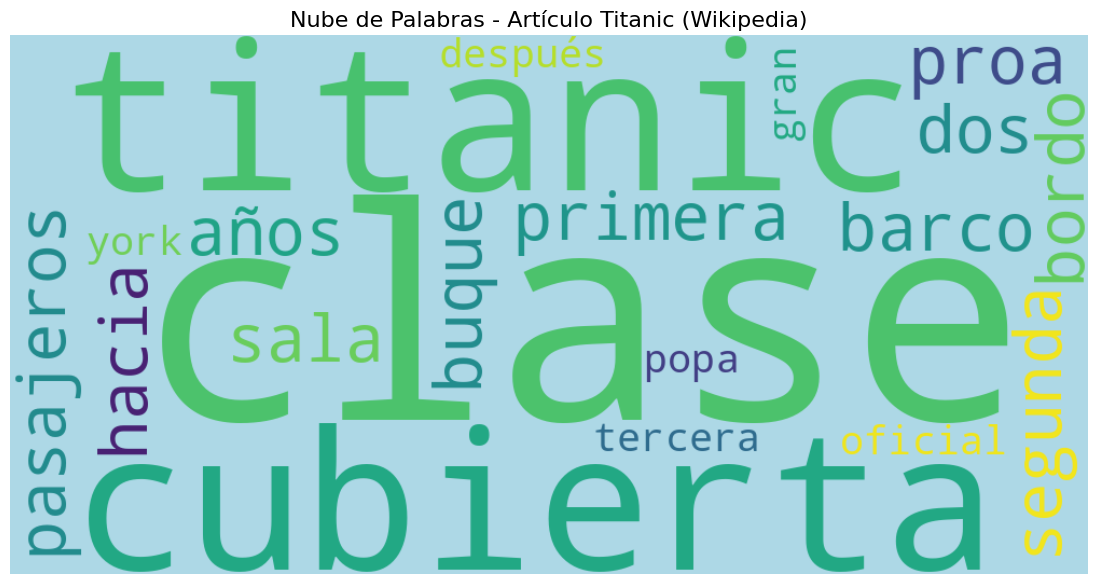

In [ ]:
#  Nube de palabras

wordcloud = WordCloud(width=1000, height=500, background_color='lightblue').generate(top)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Artículo Titanic (Wikipedia)", fontsize=16)
plt.show()